# **UCS2612 - MACHINE LEARNING LABORATORY**



**Name:** Naren Srinivasan. M

**Section:** CSE-A

**Reg No:** 3122 21 5001 057

**Aim:**

Develop a python program to predict the Online Shoppers Purchasing Intention using K-Nearest Neighbour algorithm. Visualize the features from the dataset and interpret the results obtained by the model using Matplotlib library.
The dataset consists of 12,330 sessions, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping
[1]:


**Code:**

In [ ]:
import pandas as pd
shopping_online=pd.read_csv('/home/mllab2/Desktop/onlineShop/online_shoppers_intention.csv')

In [ ]:
shopping_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
shopping_online.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
from sklearn import preprocessing

for col in shopping_online.select_dtypes(include=['object','bool']).columns:

    print(f"{col}: {shopping_online[col].unique()}")

for col in shopping_online.select_dtypes(include=['object','bool']).columns:

    shopping_online[col].fillna('unknown', inplace=True)

    shopping_online[col] = shopping_online[col].astype(str)

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(shopping_online[col].unique())

    shopping_online[col] = label_encoder.transform(shopping_online[col])

    print(f"{col}: {shopping_online[col].unique()}")

Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend: [False  True]
Revenue: [False  True]
Month: [2 5 6 8 4 3 0 7 9 1]
VisitorType: [2 0 1]
Weekend: [0 1]
Revenue: [0 1]


In [ ]:
pip install scikit-learn

     |████████████████████████████████| 11.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 39 kB/s s eta 0:00:01     |██████████████████████████▎     | 28.3 MB 10.8 MB/s eta 0:00:01     |█████████████████████████████   | 31.4 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 11.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


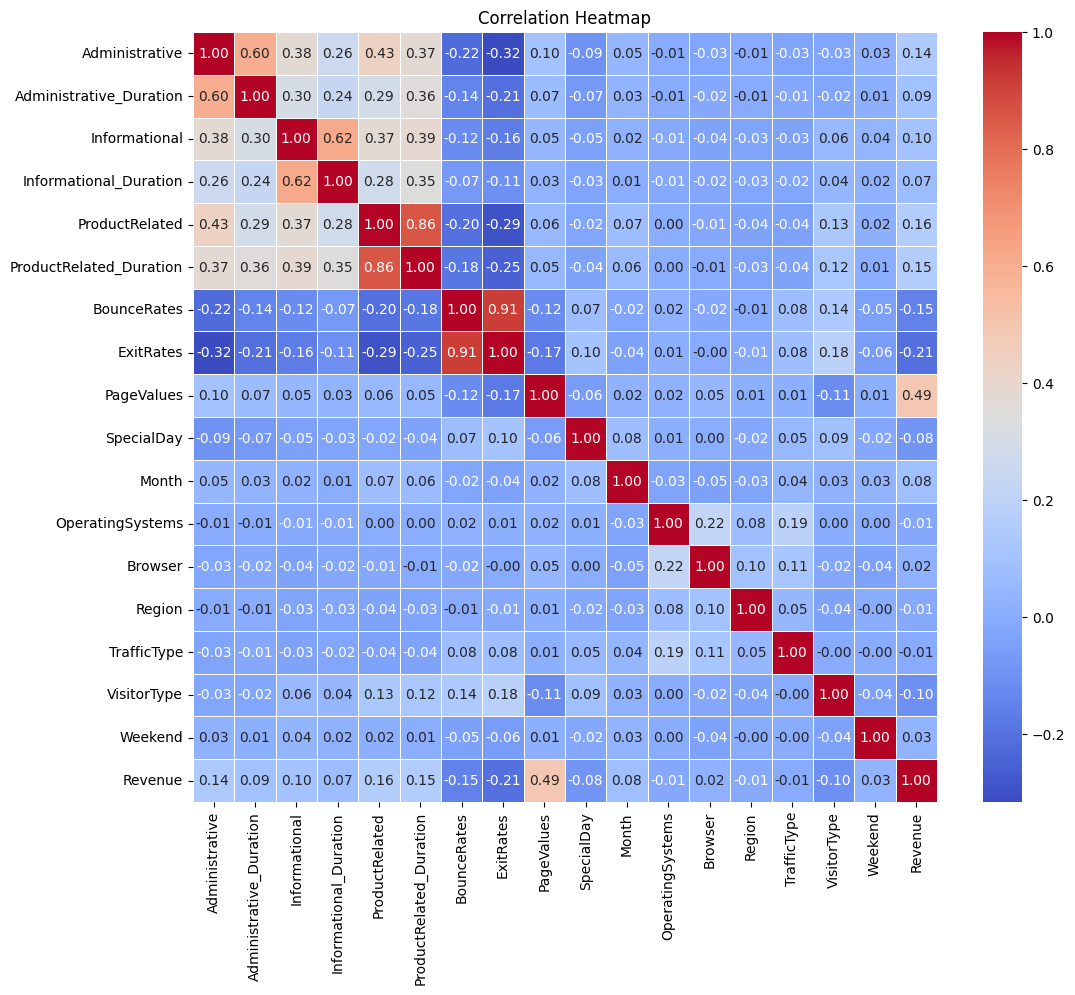

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = shopping_online.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
pip install matplotlib

     |████████████████████████████████| 9.2 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 11.2 MB/s eta 0:00:01     |██████████▌                     | 1.5 MB 11.2 MB/s eta 0:00:01     |██████████████████▉             | 2.8 MB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 16.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

     |████████████████████████████████| 294 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, make_scorer

In [ ]:
x_o=shopping_online.drop('Revenue',axis=1)
y_o=shopping_online['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_o,x_test_o,y_train_o,y_test_o=train_test_split(x_o,y_o,test_size=0.2,random_state=42,stratify=y_o)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(x_train_o, y_train_o)




KNeighborsClassifier()

In [ ]:
# Predict on the test set
y_pred_o = knn_classifier.predict(x_test_o)

# Evaluate the model
accuracy = accuracy_score(y_test_o, y_pred_o)
print("Accuracy:", accuracy)

Accuracy: 0.8499594484995945


In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common




In [ ]:
# Example usage:
# Instantiate the classifier
knn_classifier = KNNClassifier(k=5)

# Train the classifier
knn_classifier.fit(x_train_o.values, y_train_o.values)



In [ ]:
# Predict on the test set
y_pred_o = knn_classifier.predict(x_test_o.values)

# Evaluate the model
accuracy = np.mean(y_pred_o == y_test_o.values)
print("Accuracy:", accuracy)

In [ ]:

knn_classifier = KNNClassifier(k=3)

knn_classifier.fit(x_train_o.values, y_train_o.values)

y_pred_o = knn_classifier.predict(x_test_o.values)

accuracy = np.mean(y_pred_o == y_test_o.values)
print("Accuracy:", accuracy)

Accuracy: 0.8398215733982157


In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=5, epochs=1):
        self.k = k
        self.epochs = epochs

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

        for _ in range(self.epochs):
            for x, y in zip(X, y):
                self._update_weights(x, y)



In [ ]:

knn_classifier = KNNClassifier(k=5, epochs=3)

knn_classifier.fit(x_train_o.values, y_train_o.values)

y_pred_o = knn_classifier.predict(x_test_o.values)

accuracy = np.mean(y_pred_o == y_test_o.values)
print("Accuracy:", accuracy)


Accuracy: 0.8499594484995945


[0.8600973236009732, 0.8519870235198702, 0.8600973236009732]


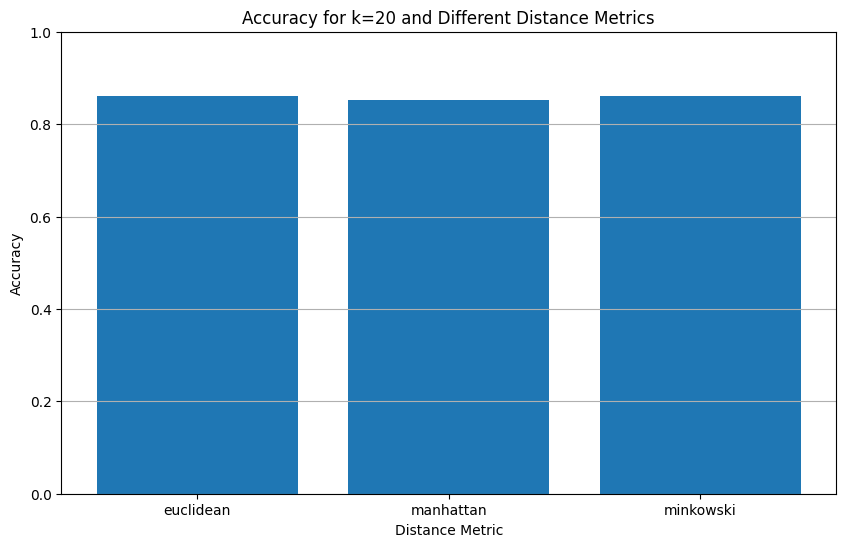

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

class KNNClassifier:
    def __init__(self, k=5, distance='euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_pred = [self._predict(dist) for dist in distances]
        return np.array(y_pred)

    def _predict(self, distances):
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

def evaluate_knn(k, distance_metrics, x_train, y_train, x_test, y_test):
    accuracies = []
    for distance_metric in distance_metrics:
        knn_classifier = KNNClassifier(k=k, distance=distance_metric)
        knn_classifier.fit(x_train, y_train)
        y_pred = knn_classifier.predict(x_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
    return accuracies

k = 20
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

accuracies = evaluate_knn(k, distance_metrics, x_train_o.values, y_train_o.values, x_test_o.values, y_test_o.values)

print(accuracies)

plt.figure(figsize=(10, 6))
plt.bar(distance_metrics, accuracies)
plt.title(f'Accuracy for k={k} and Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


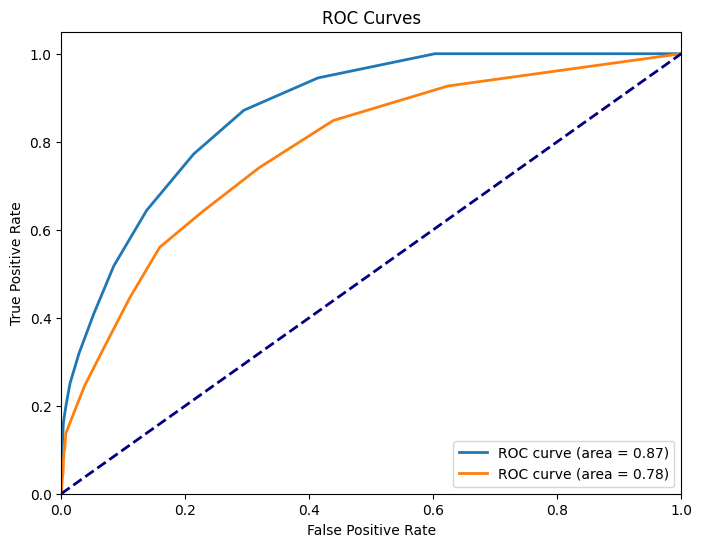

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

class KNNClassifier:
    def __init__(self, k=5, distance='euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_proba(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_probs = []
        for dist in distances:
            k_indices = np.argsort(dist)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            class_probs = [k_nearest_labels.count(c) / self.k for c in np.unique(self.y_train)]
            y_probs.append(class_probs)
        return np.array(y_probs)


def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

def plot_roc_curves(classifier, x_train, y_train, x_test, y_test, title):
    classifier.fit(x_train, y_train)
    y_train_prob = classifier.predict_proba(x_train)[:, 1]
    y_test_prob = classifier.predict_proba(x_test)[:, 1]

    plt.figure(figsize=(8, 6))
    plot_roc_curve(y_train, y_train_prob, f'Training {title} ROC Curve')
    plot_roc_curve(y_test, y_test_prob, f'Testing {title} ROC Curve')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Instantiate KNN classifier
knn_classifier = KNNClassifier(k=20, distance='euclidean')

# Plot both ROC curves
plot_roc_curves(knn_classifier, x_train_o.values, y_train_o.values, x_test_o.values, y_test_o.values, 'KNN Classifier')


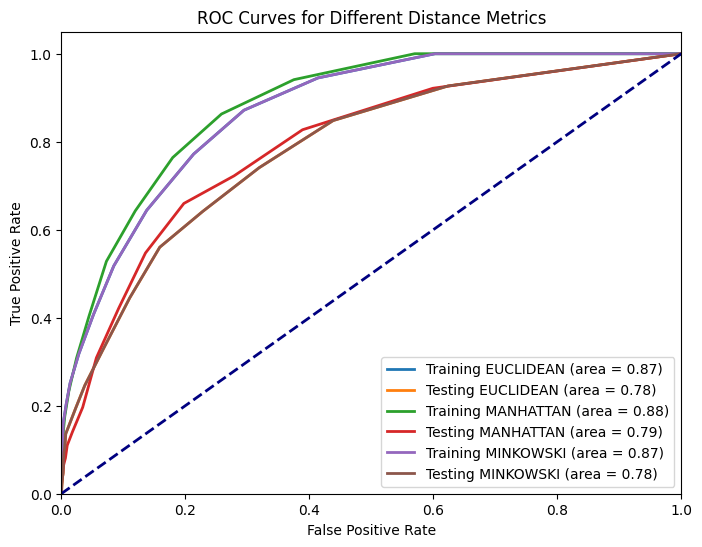

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, pairwise_distances

class KNNClassifier:
    def __init__(self, k=5, distance='euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_proba(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_probs = []
        for dist in distances:
            k_indices = np.argsort(dist)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            class_probs = [k_nearest_labels.count(c) / self.k for c in np.unique(self.y_train)]
            y_probs.append(class_probs)
        return np.array(y_probs)

def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{title} (area = %0.2f)' % roc_auc)

def plot_roc_curves(x_train, y_train, x_test, y_test, k=20):
    distance_metrics = ['euclidean', 'manhattan', 'minkowski']
    plt.figure(figsize=(8, 6))

    for distance_metric in distance_metrics:
        knn_classifier = KNNClassifier(k=k, distance=distance_metric)
        knn_classifier.fit(x_train, y_train)
        y_train_prob = knn_classifier.predict_proba(x_train)[:, 1]
        y_test_prob = knn_classifier.predict_proba(x_test)[:, 1]

        plot_roc_curve(y_train, y_train_prob, f'Training {distance_metric.upper()}')
        plot_roc_curve(y_test, y_test_prob, f'Testing {distance_metric.upper()}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Distance Metrics')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curves(x_train_o.values, y_train_o.values, x_test_o.values, y_test_o.values)


**Inference:**

• The Euclidean distance metric seems to provide smoother predictions compared to the other metrics.

• The Manhattan distance metric has more variability in predictions.

• The Minkowski distance metric performs similarly to the Euclidean metric.

• Userdefined KNN model performs better than scikit-learn KNN model.

**  **
**Learning outcome:**

• Understanding and implementing KNN Algorithm.

• Hyperparameter Tuning.

• Standardisation and Normalisation.

• Implementation of distance metrics such as Euclidean, Manhattan and Minkowski.

• Comparision between userdefined and scikit-learn KNN model’s accuracy using ROC curves.